In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the csv file
data=pd.read_csv("Real estate.csv")

In [3]:
# creating dataframe 
df=pd.DataFrame(data)

##  EDA

In [4]:
# first five rows of the dataframe
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
#shape of the dataframe
df.shape

(414, 8)

In [6]:
# name of all the columns
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
# Remove X1, X2, X3, X4 from column names
df.columns = df.columns.str.replace(r'^(X1|X2|X3|X4|X5|X6|Y)\s*', '', regex=True)

In [8]:
# datatypes of all the columns
df.dtypes

No                                       int64
transaction date                       float64
house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
latitude                               float64
longitude                              float64
house price of unit area               float64
dtype: object

In [9]:
# checking for null values
df.isnull().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [10]:
# detailed information the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [11]:
# descriptive analysis of thr dataset
df.describe()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In summary:

The distance to the nearest MRT station and house price of unit area may show slight skewness (positive and negative, respectively).
The number of convenience stores appears to be st

## Handling Outliers

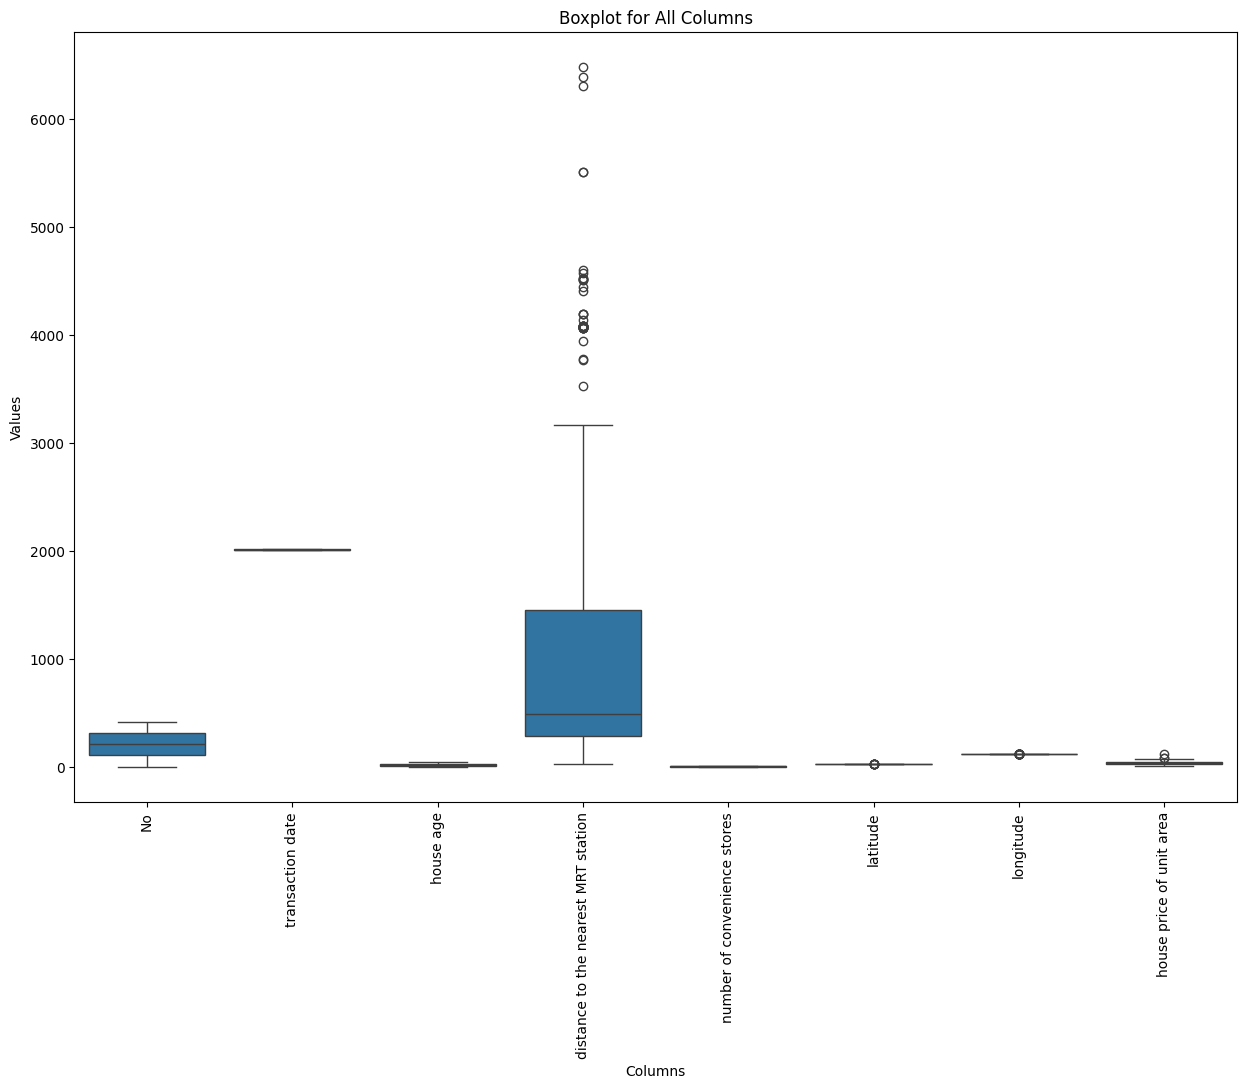

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for all columns
plt.figure(figsize=(15, 10))
df_long = df.melt(var_name='Columns', value_name='Values')  # Reshaping data for seaborn
sns.boxplot(x='Columns', y='Values', data=df_long)
plt.xticks(rotation=90)
plt.title("Boxplot for All Columns")
plt.show()

<Axes: ylabel='distance to the nearest MRT station'>

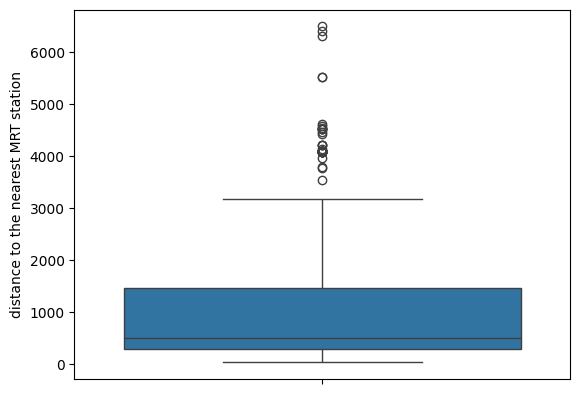

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot boxplots for distance to the nearest MRT station
sns.boxplot(df['distance to the nearest MRT station'])

<Axes: ylabel='house price of unit area'>

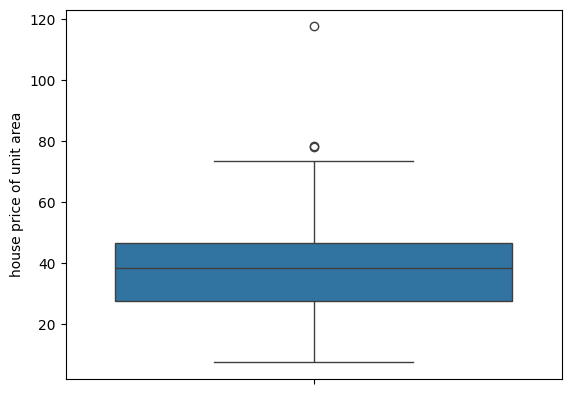

In [14]:
# Plot boxplots for house price of unit area'
sns.boxplot(df['house price of unit area'])

In [15]:
df.columns

Index(['No', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude', 'house price of unit area'],
      dtype='object')

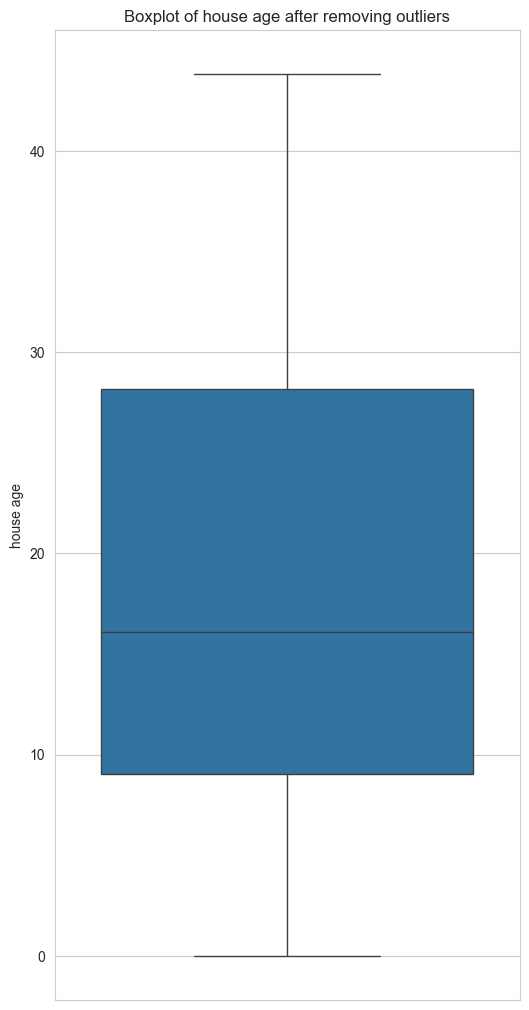

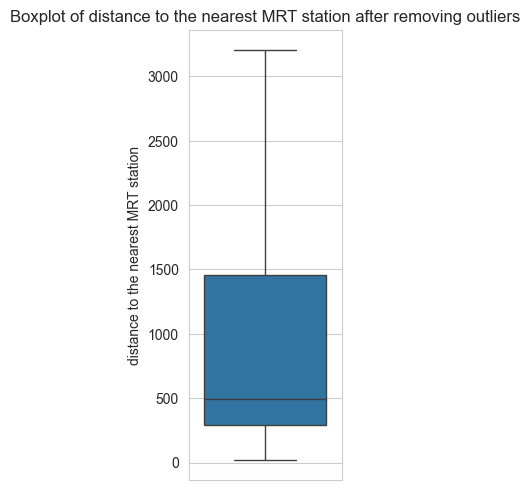

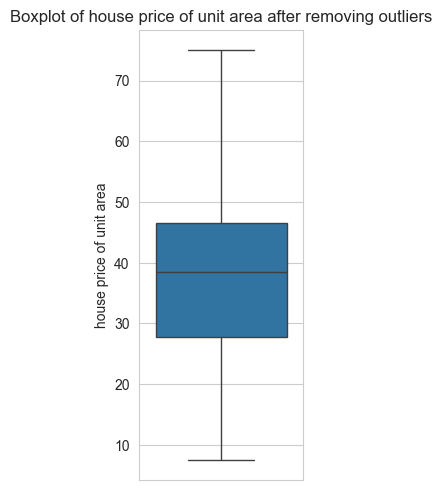

In [16]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[columns] = df[columns].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Columns from which we have to remove outliers
columns_have_oulier = ["house age", "distance to the nearest MRT station", "house price of unit area"]

# removing outliers from the specified columns
for col in columns_have_oulier:
    remove_outliers(df, col)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
# Create a seaborn boxplot for each column
for i, col in enumerate(columns_have_oulier, 1):
    plt.subplot(1, 3, i)  # Adjust layout for 3 columns
    sns.boxplot(df, y=col)  # Using seaborn boxplot
    plt.tight_layout()
    plt.title(f'Boxplot of {col} after removing outliers')
    plt.show()


## Handling Skewness

In [17]:
df.describe()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,974.545851,4.094203,24.969030,121.533361,37.861957
std,119.655756,0.281967,11.392485,968.915855,2.945562,0.012410,0.015347,13.112035
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,3201.710300,10.000000,25.014590,121.566270,74.950000


In [18]:
for col in df:
    print(col)
    print(skew(df[col]))
    print("--------------------")

No
0.0
--------------------
transaction date
-0.15002569058919962
--------------------
house age
0.38153741817729087
--------------------
distance to the nearest MRT station
1.2120609791385797
--------------------
number of convenience stores
0.1540458341286463
--------------------
latitude
-0.437007718167982
--------------------
longitude
-1.2151682334073404
--------------------
house price of unit area
0.1778157872613634
--------------------


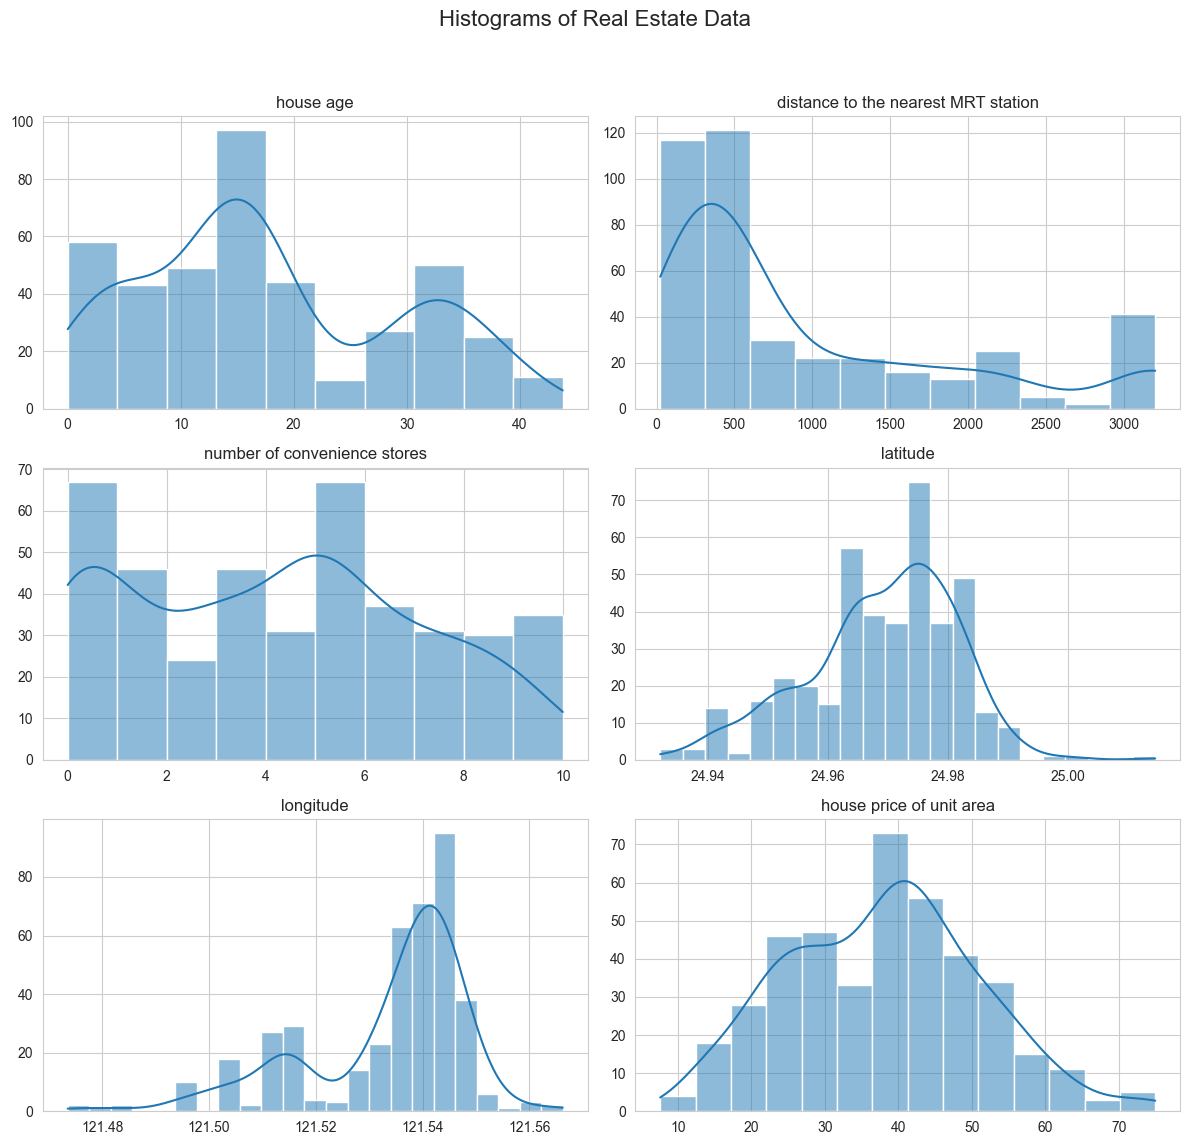

In [19]:
# Create histograms for the numerical columns
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['house age', 'distance to the nearest MRT station', 'number of convenience stores',
        'latitude', 'longitude', 'house price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

House age is relatively uniform.

Distance to MRT is concentrated near lower values.

House price shows a right-skewed distribution.

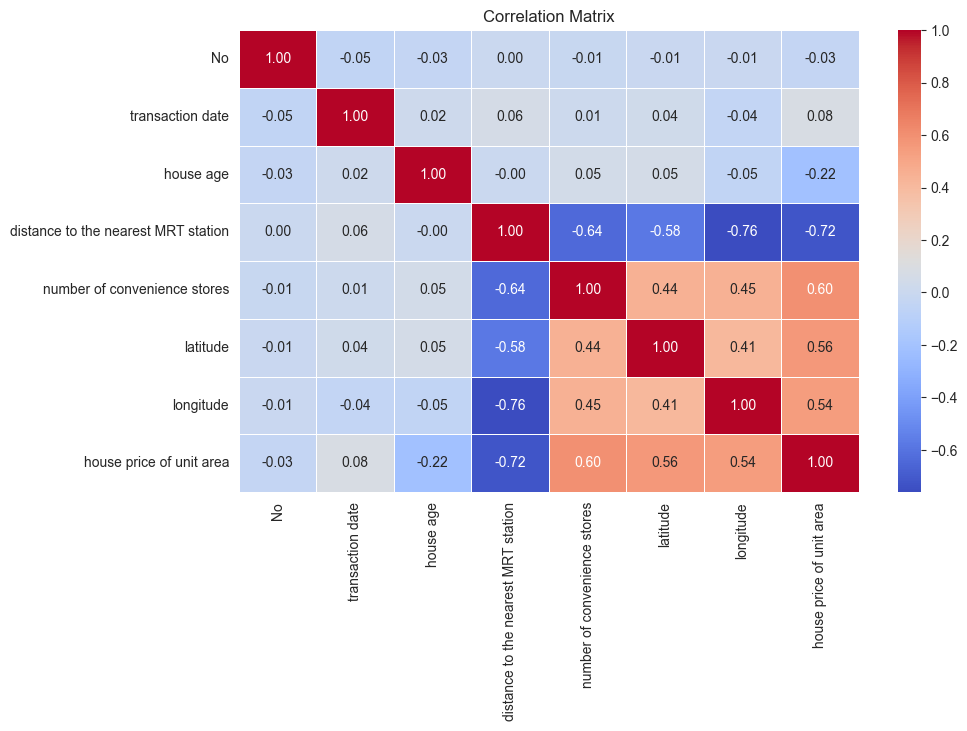

In [20]:
# Plotting the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Strong negative correlation between Distance to MRT and House Price.

Moderate positive correlation between Convenience Stores and House Price .


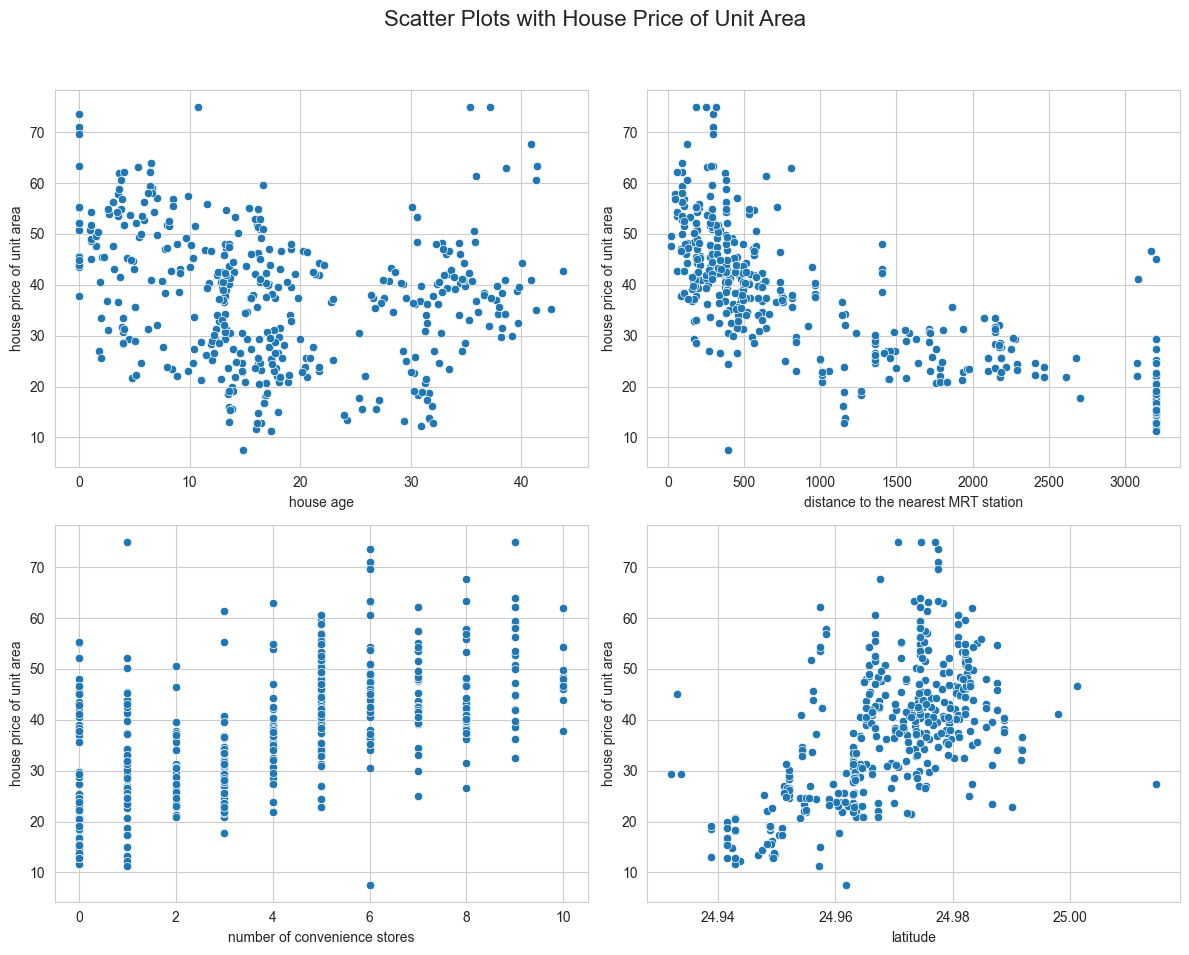

In [21]:
# Scatter plots to observe the relationship with house price
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=df, x='house age', y='house price of unit area', ax=axes[0, 0])
sns.scatterplot(data=df, x='distance to the nearest MRT station', y='house price of unit area', ax=axes[0, 1])
sns.scatterplot(data=df, x='number of convenience stores', y='house price of unit area', ax=axes[1, 0])
sns.scatterplot(data=df, x='latitude', y='house price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

House Age vs. Price: No clear linear relationship.

Distance to MRT vs. Price: Strong negative correlation.

Convenience Stores vs. Price: Positive correlation.

Latitude/Longitude vs. Price: Weak geographical correlatio

## Handling Skewness

In [22]:
df.describe()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,974.545851,4.094203,24.969030,121.533361,37.861957
std,119.655756,0.281967,11.392485,968.915855,2.945562,0.012410,0.015347,13.112035
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,3201.710300,10.000000,25.014590,121.566270,74.950000


In [23]:
for col in df:
    print(col)
    print(skew(df[col]))
    print("--------------------")

No
0.0
--------------------
transaction date
-0.15002569058919962
--------------------
house age
0.38153741817729087
--------------------
distance to the nearest MRT station
1.2120609791385797
--------------------
number of convenience stores
0.1540458341286463
--------------------
latitude
-0.437007718167982
--------------------
longitude
-1.2151682334073404
--------------------
house price of unit area
0.1778157872613634
--------------------


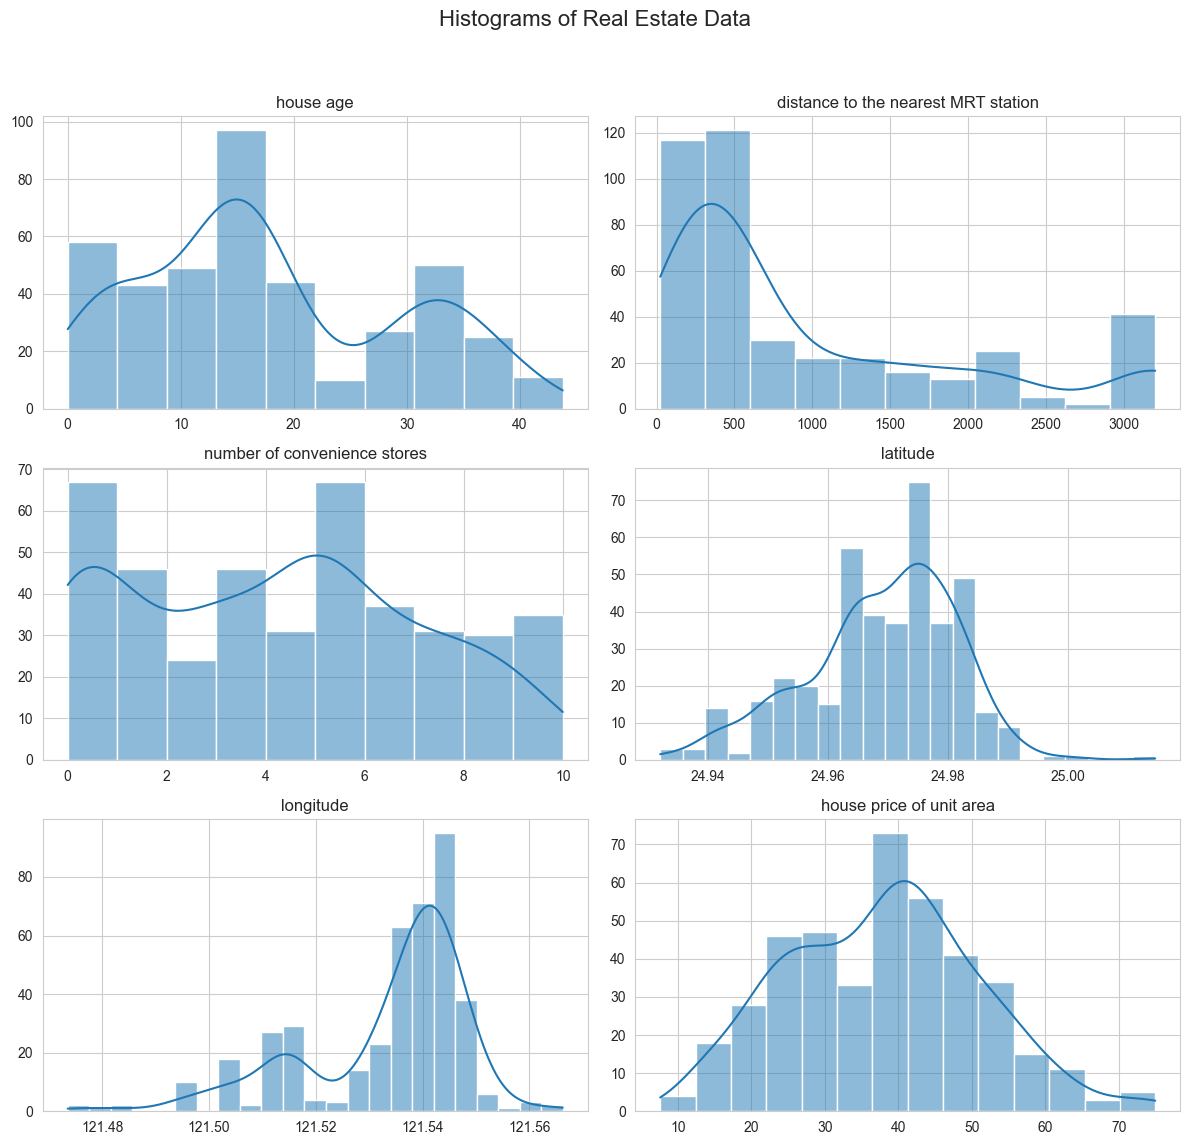

In [24]:
# Create histograms for the numerical columns
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['house age', 'distance to the nearest MRT station', 'number of convenience stores',
        'latitude', 'longitude', 'house price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

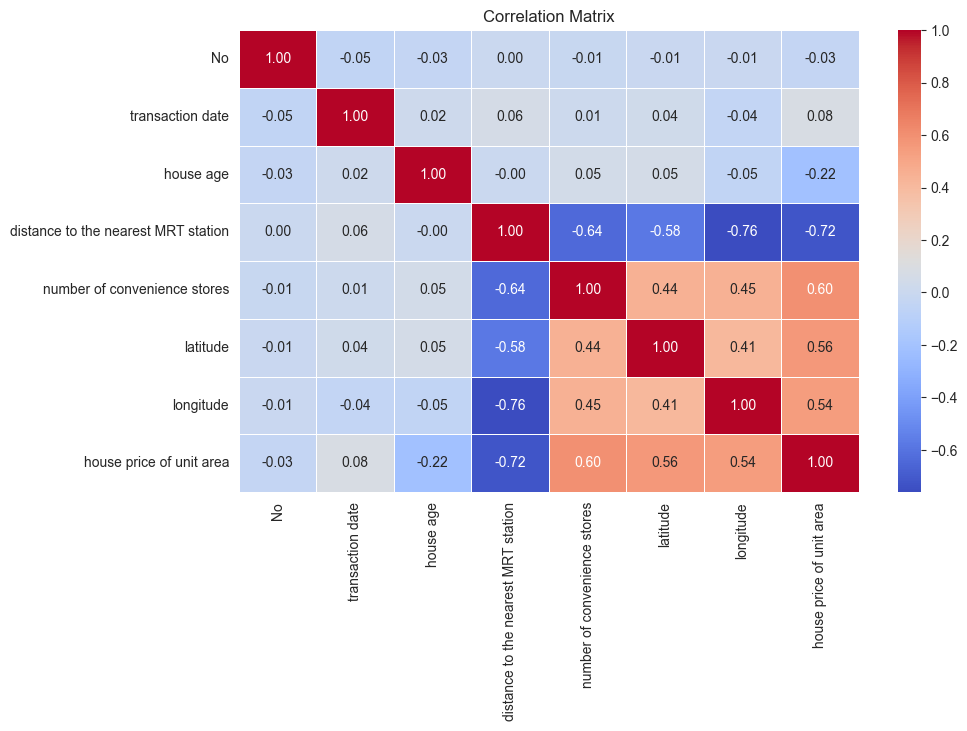

In [25]:
# Plotting the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

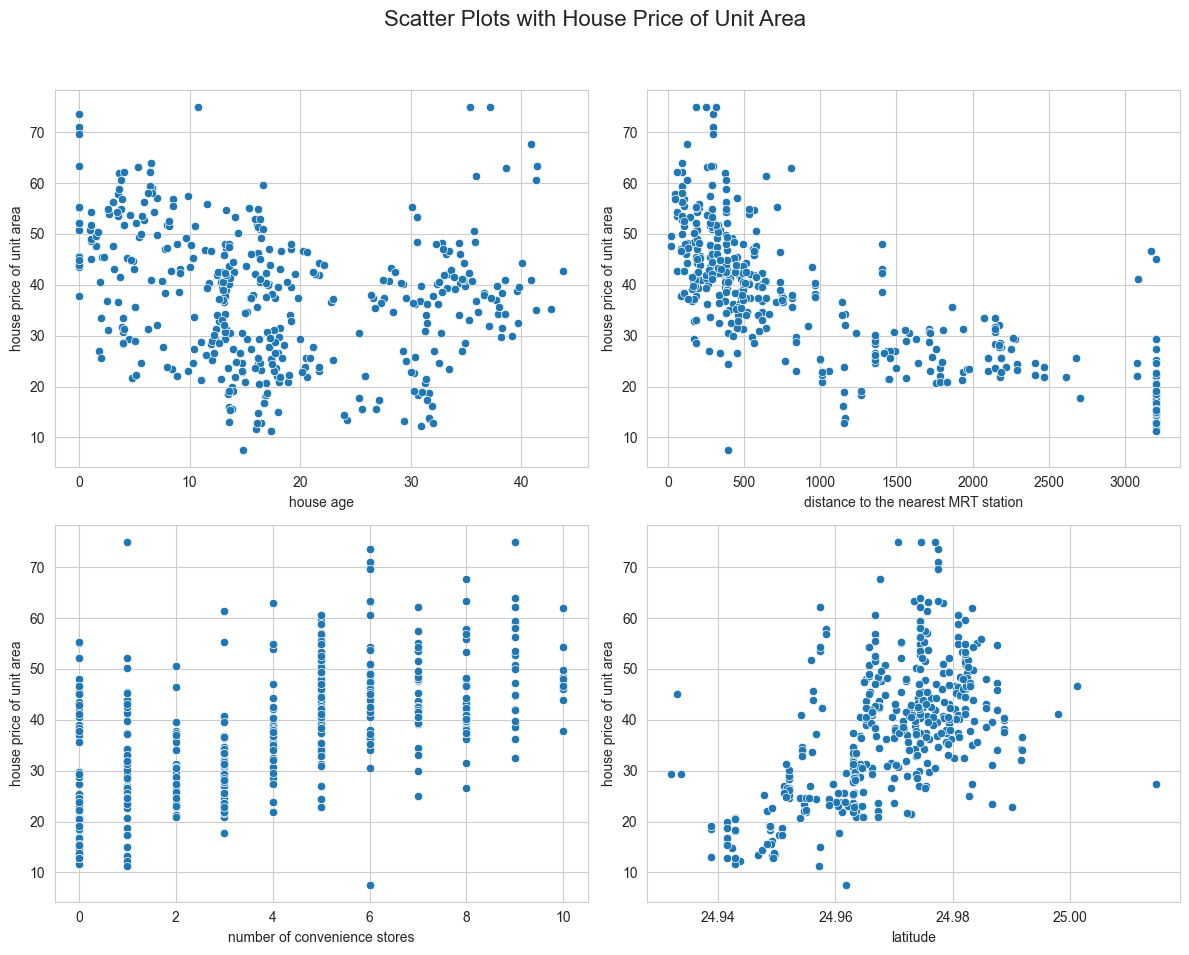

In [26]:
# Scatter plots to observe the relationship with house price
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=df, x='house age', y='house price of unit area', ax=axes[0, 0])
sns.scatterplot(data=df, x='distance to the nearest MRT station', y='house price of unit area', ax=axes[0, 1])
sns.scatterplot(data=df, x='number of convenience stores', y='house price of unit area', ax=axes[1, 0])
sns.scatterplot(data=df, x='latitude', y='house price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Reduce Skewness

In [27]:
df['distance to the nearest MRT station']=np.log(df['distance to the nearest MRT station'])

In [28]:
df['latitude']=np.log(df['latitude'])

In [29]:
df['longitude'] = np.log1p(df['longitude'] )

In [30]:
for col in df:
    print(col)
    print(skew(df[col]))
    print("--------------------")

No
0.0
--------------------
transaction date
-0.15002569058919962
--------------------
house age
0.38153741817729087
--------------------
distance to the nearest MRT station
-0.10195660492100052
--------------------
number of convenience stores
0.1540458341286463
--------------------
latitude
-0.4385415528234721
--------------------
longitude
-1.215486577185154
--------------------
house price of unit area
0.1778157872613634
--------------------


## Scaling

In [31]:
features = df.drop(columns=["No", "house price of unit area"])
target = df["house price of unit area"]

In [32]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
# Converting the scaled features back to a DataFrame for ease of use
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,-0.823683,1.255628,-1.796307,2.007407,1.125241,0.448778
1,-0.823683,0.157086,-0.596319,1.667503,0.912387,0.401161
2,1.541151,-0.387791,-0.030152,0.307885,1.486398,0.688164
3,1.246435,-0.387791,-0.030152,0.307885,1.486398,0.688164
4,-1.121951,-1.117223,-0.370135,0.307885,0.834173,0.592932


#  Linear regression

In [34]:
# Selecting features and target variable
features = ['distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude']
target = 'house price of unit area'

In [35]:
X = df[features] # input features
y = df[target]   # target features

In [36]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Model initialization
lr= LinearRegression()

In [38]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
# Making predictions using the linear regression model
y_pred_lr = lr.predict(X_test)

In [40]:
residuals=y_test-y_pred_lr

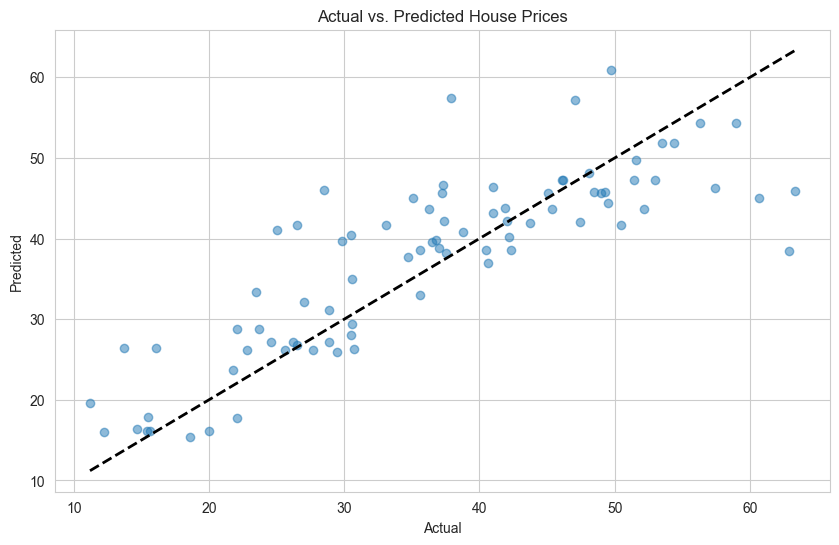

In [41]:
# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
# Manually specify the color for the line
line_color = 'green' 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

## Evaluationg the regression model

In [42]:
# Evaluate the regression model by calcualting MSE and R2 score
print("Regression Evaluation:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

Regression Evaluation:
Mean Squared Error (MSE): 53.30586870033478
R-squared: 0.6822487489309427


 # Clustering (K-Means Clustering):

In [43]:
# Selecting numerical columns for clustering
numerical_features = ['house age', 'distance to the nearest MRT station', 
                      'number of convenience stores', 'latitude', 'longitude']
X = df[numerical_features]

In [44]:
# Scaling the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Determining the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

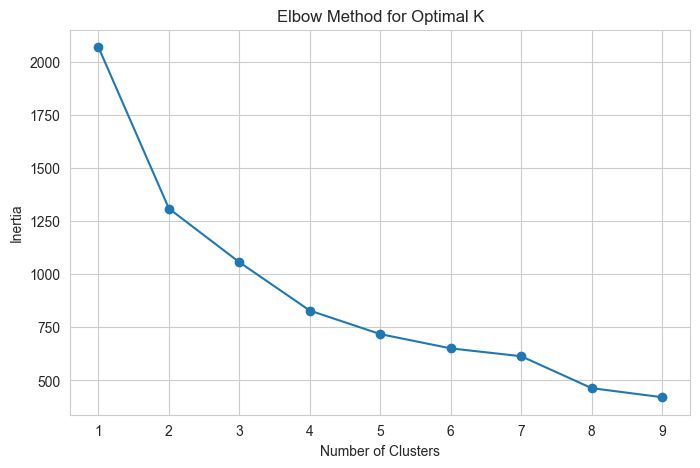

In [46]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [47]:
# Apply K-means clustering with the optimal number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [48]:
# Adding cluster labels to the dataframe
df['Cluster'] = clusters

In [49]:
df.columns

Index(['No', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude', 'house price of unit area', 'Cluster'],
      dtype='object')

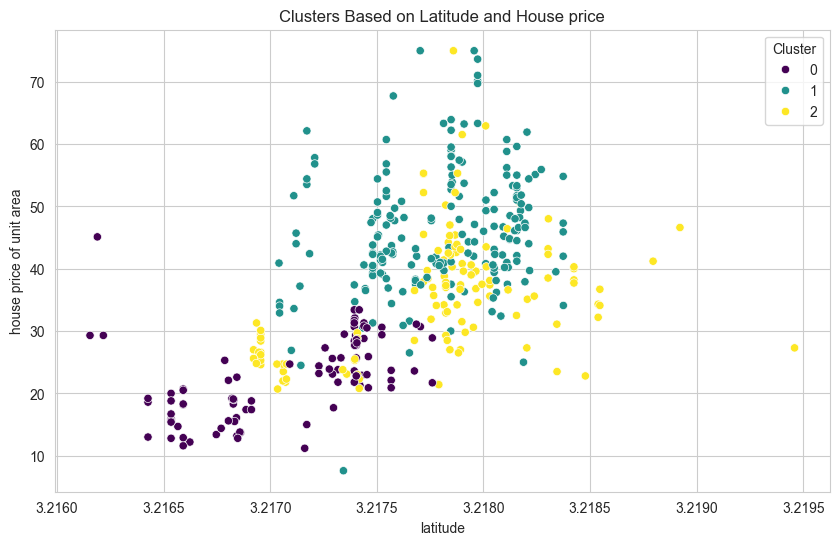

In [50]:
# Visualizing clusters using latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='latitude', y='house price of unit area', hue='Cluster', palette='viridis')
plt.title('Clusters Based on Latitude and House price')
plt.show()


# Binary Classification (Random Forest Classifier):

In [51]:
# Define binary classification for price
# We consider properties with prices above the median as "Expensive" (1), others as "In Budget" (0)
median_price = df['house price of unit area'].median()
print("Median Price:", median_price)

Median Price: 38.45


In [52]:
# Create a binary column
def price_to_bin(price):
    if price > median_price:
        return 1  # Expensive
    else:
        return 0  # In Budget


In [53]:
df['price_bin'] = df['house price of unit area'].apply(price_to_bin)
print(df['price_bin'].value_counts())  # Check distribution of binary classes

price_bin
0    207
1    207
Name: count, dtype: int64


In [54]:
# Define features and target
X = df[['house age', 'distance to the nearest MRT station', 
        'number of convenience stores', 'latitude', 'longitude']]
y = df['price_bin']

In [55]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [56]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, random_state=1)

In [57]:
# Evaluate the model
y_pred = rf.predict(X_test)

In [58]:
# Classification metrics
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy on Test Data: 0.888

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89        65
           1       0.84      0.95      0.89        60

    accuracy                           0.89       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.89      0.89      0.89       125


Confusion Matrix:
 [[54 11]
 [ 3 57]]


In [59]:
df.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,Cluster,price_bin
0,1,2012.917,32.0,4.441225,10,3.218195,4.808439,37.9,1,0
1,2,2012.917,19.5,5.725527,9,3.218089,4.808434,42.2,1,1
2,3,2013.583,13.3,6.331474,5,3.218374,4.808469,47.3,1,1
3,4,2013.500,13.3,6.331474,5,3.218374,4.808469,54.8,1,1
4,5,2012.833,5.0,5.967603,5,3.218050,4.808458,43.1,1,1
